# CIS 5450 Homework 4: Machine Learning

*Due Date: **November 15th at 10:00PM EST**, 100 points total (= 81 autograded + 19 manually graded).*


# Imports/Setup
Run the following cells to set up the notebook.


Please make sure you enter your **8 digit Penn ID** in the  student ID field below.

In [ ]:
%%capture
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0
from penngrader.grader import *

#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
#TO ASSIGN POINTS TO YOU IN OUR BACKEND

STUDENT_ID = 58076764       # YOUR PENN-ID GOES HERE AS AN INTEGER

In [ ]:
%%writefile config.yaml

grader_api_url: 'https://wyv616tp17.execute-api.us-east-1.amazonaws.com/default/Grader'
grader_api_key: 'Kd32fl3g3p917iM0zwjiO23Bitj4PO9ga4LektOa'

Overwriting config.yaml


In [ ]:
grader = PennGrader('config.yaml', 'CIS5450_F23_HW4', STUDENT_ID, STUDENT_ID)

PennGrader initialized with Student ID: 58076764

Make sure this correct or we will not be able to store your grade


In [ ]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
%%capture
!apt update
!pip install kaggle

# **Part I:** Preprocessing and Modeling in `scikit-learn` (65 points)

## **1.1** Data Loading and Preprocessing [0 Points]

### **1.1.1** Read and Load Data

We are using one CSV for this homework, `properties_data.csv` from a Kaggle [dataset](https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset/data). The dataset contains 38 columns and over 1900 property entries.

To get the data in here:
1. Go to this [Kaggle link](https://www.kaggle.com) and create a Kaggle account (unless you already have one)
2. Go to Account and click on "Create New API Token" to get the API key in the form of a json file `kaggle.json`
3. Upload the `kaggle.json` file to the default location in your Google Drive (Please **DO NOT** upload the json file into any _specific_ folder as it will be difficult for us to debug issues if you deviate from these instructions!).

This can be helpful for your project if you decide to use Kaggle for your final project or for future projects!

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create the kaggle directory and
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!!kaggle datasets download -d dataregress/dubai-properties-dataset

['dubai-properties-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [ ]:
# Unzip folder in Colab content folder
!unzip /content/dubai-properties-dataset.zip

Archive:  /content/dubai-properties-dataset.zip
replace properties_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# TODO: Read the csv file and save it to a dataframe called "df_properties"
df_properties = pd.read_csv("properties_data.csv")

### **1.1.2** Understanding Data

A good practice before approaching any data science problem, is to understand the data you will be working with. This can be through descriptive statistics, datatypes, or just a quick tabular visualization. We will be walking through such tasks through Pandas.

## **1.2** EDA [subtotal 18 points]

Exploratory Data Analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


### **1.2.1** Visualization [12 points]

#### (a) Examining Neighborhood and Quality [6 Points]

**Task:** For the ***top ten neighborhoods with the most properties***, we want to find the number of Low, Medium, High, Ultra listings from the `quality` column. You are **required** to use the Seaborn library for this problem to create a [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html).

**Requirements:**

You should use `df_properties` for this problem.

Your plot must:
*   Be of size (8,6) and use `palette = 'husl'`.
*   Have appropriate titles, axes labels, and a legend.
*   Be clearly legible and should **not** have overlapping text or bars.

*Note: Not all neighborhoods will have all four qualities (low, medium, high, ultra). In other words, you may not see four bars for all neighborhoods.*

In [ ]:
# TODO: create a list 'top_ten_neighborhoods' which contains the top ten neighborhoods
# with the MOST number of properties in descending order

top_ten_neighborhoods = df_properties['neighborhood'].value_counts().head(10).index

In [ ]:
# TODO (2 points):
# filter for entries in 'df_properties' that contain the neighborhoods in 'top_ten_neighborhoods'
# save your dataframe as 'ten_neighborhoods_df

ten_neighborhoods_df = df_properties[df_properties['neighborhood'].isin(top_ten_neighborhoods)]

In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'ten_neighborhoods', answer = (top_ten_neighborhoods, ten_neighborhoods_df))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


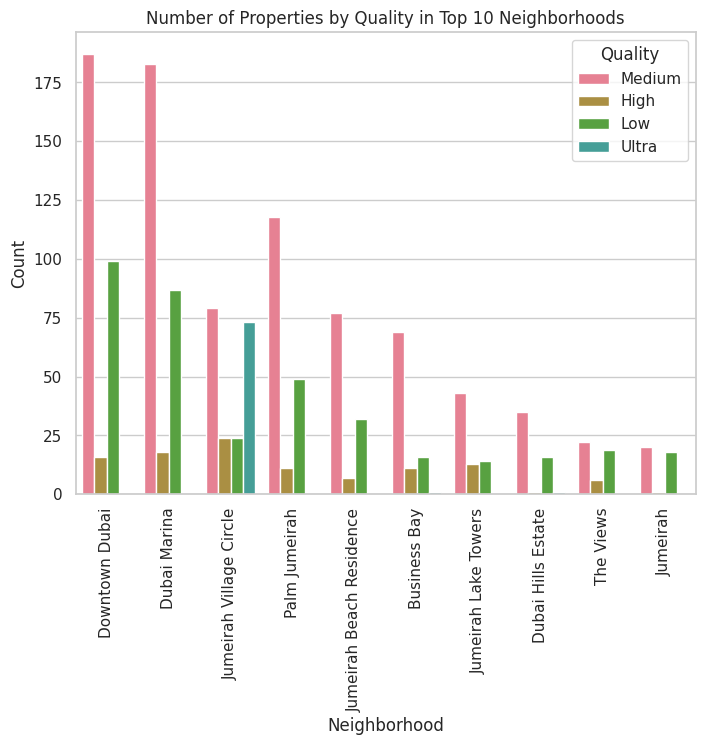

In [ ]:
# TODO (4 Manually Graded Points)
# create a count plot which has bars placed side by side in a single plot
# showing the number of Low, Medium, High, Ultra quality property listings
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.set_palette("husl")

plot = sns.countplot(data=ten_neighborhoods_df, x='neighborhood', hue='quality', order=top_ten_neighborhoods)

plot.set_title("Number of Properties by Quality in Top 10 Neighborhoods")
plot.set_xlabel("Neighborhood")
plot.set_ylabel("Count")
plt.xticks(rotation=90)
plot.legend(title='Quality', loc='upper right')
plt.show()

#### (b) 3D Scatterplot [6 Points]

**Task:** We want to examine the relationship between three variables: `number_of_bedrooms`, `number_of_bathrooms`, and `price`. We also want to examine `quality` as well. You are **required** to use the Matplotlib library for this problem to create a [3D Scatterplot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html).

**Requirements:**

You should use `df_properties` for this problem.

Your plot must:
*   Be of size (6,6).
*   Have each data point be colored accordingly by `Quality`. The color mapping should be: Low is red, Medium is green, High is blue, and Ultra is magenta.
*   Have `number_of_bedrooms` in the x-axis, `number_of_bathrooms` in the y-axis, and `price` in the z-axis.
*   Have appropriate titles, axes labels, and a legend.
*   Be clearly legible and should **not** have overlapping text or bars.


**Very Helpful Resources:**

*   [3D Scatter Plotting in Python using Matplotlib](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/)
*   [List of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)


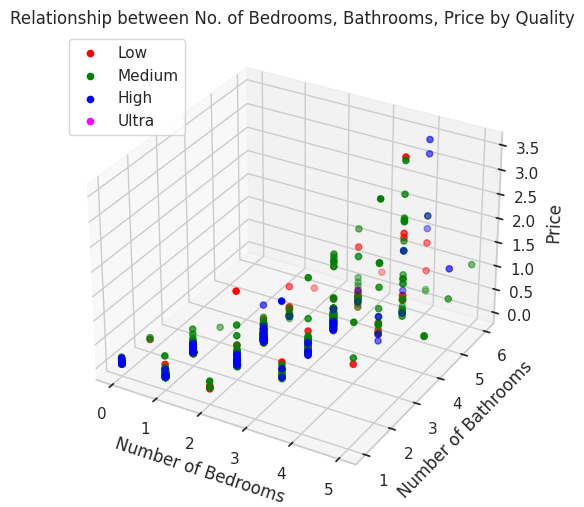

In [ ]:
import matplotlib.pyplot as plt

# TODO (6 Manually Graded Points): create 3d scatter plot
# the comments will guide you through the process

number_of_bedrooms = df_properties['no_of_bedrooms']
number_of_bathrooms = df_properties['no_of_bathrooms']
price = df_properties['price']
quality = df_properties['quality']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

color_dict = {
    'Low': 'red',
    'Medium': 'green',
    'High': 'blue',
    'Ultra': 'magenta'
}

for qual in color_dict.keys():
    ax.scatter(number_of_bedrooms[quality == qual],
               number_of_bathrooms[quality == qual],
               price[quality == qual],
               c=color_dict[qual])

ax.set_title("Relationship between No. of Bedrooms, Bathrooms, Price by Quality")
ax.set_xlabel("Number of Bedrooms")
ax.set_ylabel("Number of Bathrooms")
ax.set_zlabel("Price")


### STOP HERE ###
### DO NOT EDIT ###
for quality, color in color_dict.items():
    ax.scatter([], [], [], c=color, marker='o', label=quality)
ax.legend(loc='upper left')
plt.show()

### **1.2.2** Correlation of Feature Variables [6 Points]

With multiple features, it can be somewhat exhausting to do bivariate analysis on every possible pair of features. While you certainly should, your first instinct should be to check for the correlation between features since certain models (e.g. Linear Regression) won't work well if we have strong multicollinearity.

_**Isolating Numerics from Categorical Features**_

Before anything else, it may help to create groups of the numeric and categorical variables. You should use `df_properties` for this problem.


**Task:** Split the `df_properties` dataframe into 2 dataframes:

1. `num_df`: This dataframe contains all numerical columns from `df_properties`

2. `cat_df`: This dataframe contains all categorical columns from `df_properties`
  - i.e. the columns with non-numeric datatype or containing boolean values

For your dataframes, **do not include** the following columns: `id`, `latitude`, `longitude`, `quality`, `price`.

**Sort the columns of `num_df` and `cat_df` in alphabetic order.**

In [ ]:
# visualize number of unique values and datatype in each column
for col in df_properties.columns:
  print(col, df_properties[col].nunique(), df_properties[col].dtype)

id 1905 int64
neighborhood 54 object
latitude 723 float64
longitude 722 float64
price 821 int64
size_in_sqft 1121 int64
price_per_sqft 1784 float64
no_of_bedrooms 6 int64
no_of_bathrooms 6 int64
quality 4 object
maid_room 2 bool
unfurnished 2 bool
balcony 2 bool
barbecue_area 2 bool
built_in_wardrobes 2 bool
central_ac 2 bool
childrens_play_area 2 bool
childrens_pool 2 bool
concierge 2 bool
covered_parking 2 bool
kitchen_appliances 2 bool
lobby_in_building 2 bool
maid_service 2 bool
networked 2 bool
pets_allowed 2 bool
private_garden 2 bool
private_gym 2 bool
private_jacuzzi 2 bool
private_pool 2 bool
security 2 bool
shared_gym 2 bool
shared_pool 2 bool
shared_spa 2 bool
study 2 bool
vastu_compliant 2 bool
view_of_landmark 2 bool
view_of_water 2 bool
walk_in_closet 2 bool


In [ ]:
# TODO: Create 'num_df' and 'cat_df'
exclude_columns = ['id', 'latitude', 'longitude','price']
num_df = df_properties.select_dtypes(include=['int64', 'float64']).drop(columns=exclude_columns)
cat_df = df_properties.select_dtypes(include=['object', 'bool']).drop(['quality'], axis=1)


In [ ]:
# TODO: sort the columns of `num_df` and `cat_df` in alphabetic order
num_df = num_df.reindex(sorted(num_df.columns), axis=1)
cat_df = cat_df.reindex(sorted(cat_df.columns), axis=1)

In [ ]:
# self-check
num_df.columns

Index(['no_of_bathrooms', 'no_of_bedrooms', 'price_per_sqft', 'size_in_sqft'], dtype='object')

In [ ]:
# self-check
cat_df.columns

Index(['balcony', 'barbecue_area', 'built_in_wardrobes', 'central_ac',
       'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking',
       'kitchen_appliances', 'lobby_in_building', 'maid_room', 'maid_service',
       'neighborhood', 'networked', 'pets_allowed', 'private_garden',
       'private_gym', 'private_jacuzzi', 'private_pool', 'security',
       'shared_gym', 'shared_pool', 'shared_spa', 'study', 'unfurnished',
       'vastu_compliant', 'view_of_landmark', 'view_of_water',
       'walk_in_closet'],
      dtype='object')

In [ ]:
#Grader Cell (3 points)
grader.grade(test_case_id = 'cat_num_df', answer = (num_df, cat_df))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


_**Correlation Heatmap**_

**Task:** Create a correlation matrix using `num_df` and call it `corr_mat`. Using the correlation matrix, generate a correlation heatmap for these numeric features. You are required to use Seaborn library to create this [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

Make sure your correlation heatmap meets the following criteria:
*   Ensure that your heatmap is sized (8,8): all feature labels should be visible on both the $x$-axis and $y$-axis
*   Use the `RdBu` color map to ensure that negative correlations are red and positive correlations are blue
*   Standardize the color scale so that -1 takes the darkest red color, 0 is totally white, and +1 takes the darkest blue color

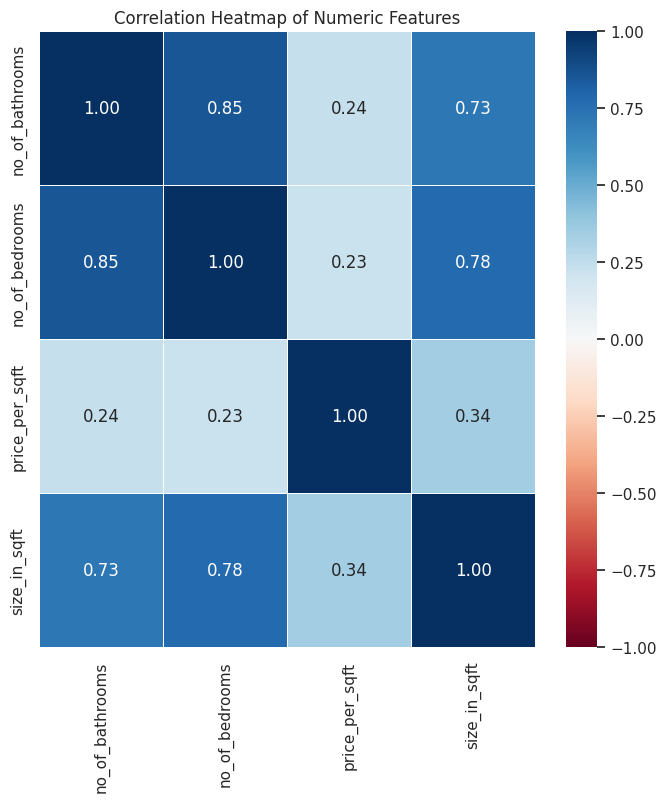

In [ ]:
# TODO: Plot correlation heatmap (3 Manually Graded Points)

corr_mat = num_df.corr()
plt.figure(figsize=(8, 8))

sns.heatmap(corr_mat, annot=True, cmap='RdBu', vmin=-1,vmax=1, center=0, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


## **1.3** Feature Engineering [subtotal 4 points]

Feature engineering is the process of applying domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

### **1.3.1** Cast Boolean Values into Integers [2 Points]

Encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In this section, we want to cast the columns containing Boolean variables into integer values (0 and 1).

**Task:**

*   You should use `properties_df` for this problem.
*   Drop the following columns `id`, `latitude`, `longitude`, `neighborhood`.
*   Cast all the columns with Boolean variables as integer values (0 and 1).
*   Save results in `encoded_properties_df`.


In [ ]:
# TODO: drop columns from `df_properties`
drop_columns = ['id', 'latitude', 'longitude', 'neighborhood']
df_properties = df_properties.drop(columns=drop_columns)

In [ ]:
# TODO: cast boolean columns into integers
bool_columns = df_properties.select_dtypes(include=['bool']).columns
df_properties[bool_columns] = df_properties[bool_columns].astype(int)
encoded_df_properties = df_properties

In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'one_hot_encoded', answer = encoded_df_properties.head(10))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.3.2** Encode Classes in 'Quality' Column [2 Points]

**Task:** We will be predicting the `quality` for our classification problem. We first want to transform our target into numerical values. Map the classes in the quality column in the following way:
*   Low: 0
*   Medium: 1
*   High: 2
*   Ultra: 3

You should use `encoded_df_properties` for this problem. Save your results in `encoded_df_properties`.

In [ ]:
# TODO: create and apply a mapping
quality_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}
encoded_df_properties['quality'] = encoded_df_properties['quality'].map(quality_mapping)

In [ ]:
# self-check
encoded_df_properties['quality'].unique()

array([1, 0, 2, 3])

In [ ]:
#Grader Cell (2 points)
grader.grade(test_case_id = 'quality_map', answer = (encoded_df_properties['quality'], encoded_df_properties.head(20)['quality']))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **1.4** Modeling (sklearn) [subtotal 43 points]

### **1.4.1** Preprocessing: Create Features and Label and Split Data into Train and Test [4 Points]

Now that we have explored and cleaned our dataset, let's prepare it for a machine learning task. In this homework, you will work with various models and attempt to predict the `quality` of the property.

The features will be all the variables in the dataset **except** `quality`, which will act as the label for our problem. First, store these two as `features` (pd.DataFrame) and `target` (pd.Series), respectively.

In [ ]:
# TODO: stores features dataframe into variable called "features"
features = encoded_df_properties.drop(columns=['quality'])

# TODO: store the classification target variable into "target"
target = encoded_df_properties['quality']

Now, use Scikit-learn's [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to split data for regression into training and testing sets. The split should be 80-20 meaning 80% for training and the rest for testing.

**_IMPORTANT_: Please set the `seed` variable to 42 and then set the parameter to `random_state = seed`** and store the resulting splits as `X_train, X_test, y_train,` and `y_test`.

If you want to understand the purpose of *seed*, please feel free read over this concise yet thorough explanation on [StackOverflow](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do).

In [ ]:
# TODO: Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
from sklearn.model_selection import train_test_split
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=seed)

In [ ]:
# Grader cell (4 points)
grader.grade(test_case_id = 'train_test_split_classification', answer = (X_train.shape, X_test.shape,
                                                                     y_train.shape, y_test.shape,
                                                                     seed, Counter(y_test)))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.2** Classification Models [15 points]

#### (a) Logistic Regression [2 Points]

Fit a Logistic Regression classifier on the `X_train` and `y_train` with the hyperparameters provided below. Calculate the accuracy of the model on the test set using the `score` method and store it in a variable named `log_acc`.

**Task:**

*   Read the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for Logistic Regression.
*   For hyperparameters, set the `penalty = None` and set `multi_class = 'multinomial'`.
*   Train the logistic regression model and evaluate it using the `score` method.
*   Save your score in a variable `log_acc`.

In [ ]:
# TODO: Import required libraries
from sklearn.linear_model import LogisticRegression
# TODO: Initialize model with the parameters mentioned above and fit it on the training set

logistic_regression = LogisticRegression(penalty='none', multi_class='multinomial', random_state=42)
# TO-DO: Use the model to predict on the test set and save these predictions as `y_pred`

logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
# TO-DO: Find the accuracy and store the value in `log_acc`
log_acc =logistic_regression.score(X_test, y_test)

log_acc

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


0.5931758530183727

In [ ]:
#Grader Cell [2 points]
grader.grade(test_case_id = 'check_log_clf', answer = log_acc)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### (b) Random Forest Classifier [3 Points]

Fit a Random Forest classifier on the `X_train` and `y_train` with the hyperparameters provided below. Calculate the accuracy of the model on the test set using the `score` method and store it in a variable named `rf_acc`.

**Task:**

*   Read the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for Random Forest Classifier.
*   For hyperparameters, set:
    - `class_weight = 'balanced'`
    - `n_estimators = 120`
    - `max_depth = 30`
    - `random_state = 42`
*   Train the random forest classifier model and evaluate it using the `score` method.
*   Save your score in a variable `rf_acc`.
*   Also, compute a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) for your prediction and save it to `rf_confusion`.

In [ ]:
# TODO: Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# TODO: Initialize model with given parameters and fit it on the training set

random_forest = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=120,
    max_depth=30,
    random_state=42
)
# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
# TODO: Find the accuracy and store the value in `rf_acc`
rf_acc = random_forest.score(X_test, y_test)

# TODO: Compute the confusion matrix.
rf_confusion = confusion_matrix(y_test, y_pred)

# self-check
rf_acc, rf_confusion

(0.9212598425196851,
 array([[ 97,  15,   0,   0],
        [  1, 225,   2,   0],
        [  0,  12,  17,   0],
        [  0,   0,   0,  12]]))

In [ ]:
#Grader Cell
grader.grade(test_case_id = 'check_rf_clf', answer = (rf_acc, rf_confusion))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### (c) PCA to Reduce Dimensionality [6 Points] (2 manually graded points)

The goal of Principal Component Analysis is to reduce number of dimensions of our features. Please read the documentation for [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) before attempting the problem.

*Hint: Understanding of standardization and respective Scikit-learn functions under StandardScaler() class, like fit(), fit_transform(), transform(), is commonly tested on Midterm 2, so we advise you read the documentation. 👀*

_**Initial PCA**_

As a first step instantiate and fit `PCA` from scikit-learn on your training set. We are not reducing the dimensionality of our data in this step but rather trying to find what would be the ideal number of Principal Components to choose. So keep all Principal Components for this step

Please remember that PCA is **not** scale-invariant! What does this imply you need to do first?

In [ ]:
# TODO: Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# TODO: Intermediate step to address scale-invariance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# TODO: Instantiate and Fit PCA
pca = PCA()
pca.fit(X_train_scaled)

PCA()

_**Cumulative Explained Variance Ratios**_

Create an array of explained variance ratios and store it into a variable called `explained_variance_ratios`. Also, calculate the _cumulative_ explained variance ratios and store that into another variable called `cum_evr`.

In [ ]:
# TODO: Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_


# TODO: Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr =  explained_variance_ratios.cumsum()


In [ ]:
# 2 points
#Grader cell
grader.grade(test_case_id = 'check_pca_explained_variance', answer = (explained_variance_ratios, cum_evr))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Task:** Plot the _cumulative_ `explained_variance_ratio` against the number of components to decide the number of components you should keep. Also add a horizontal line that represents the 80% of the variance as a threshold.

As before, you should ensure that the plot follows the best practices you've developed over the past 2 plotting exercises in this HW (Labelling the axes and adding title to the plot). **This will be manually graded for 2 points**

**Requirements:**

You should use `cum_evr` and Matplotlib for this problem.

Your plot must:
*   Be of size (8,3) and have both lines clearly represented.
*   Have appropriate titles and axes labels and correct ticks.
*   Be clearly legible and should **not** have overlapping text.

_**CAUTION:** Recall that Python starts counting from 0, but this would make it very unintuitive when reading from your graph. We strongly recommend that you modify the x-axis of your graph so that the **number of components begins at 1**. Otherwise, you may risk making silly mistakes in the subsequent sections._

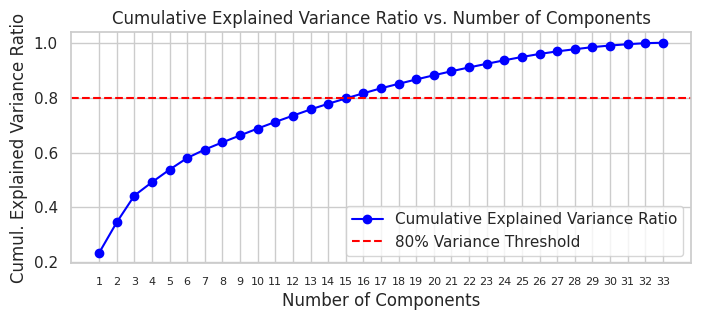

In [ ]:
# TODO: (2 Manually Graded Points) find optimal num components
# to use (n) by plotting explained variance ratio
# Set the figure size
plt.figure(figsize=(8,3))
plt.plot(range(1, len(cum_evr) + 1), cum_evr, marker='o', label='Cumulative Explained Variance Ratio', color='blue')
plt.axhline(y=0.80, color='red', linestyle='--', label='80% Variance Threshold')
plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumul. Explained Variance Ratio")
plt.xticks(range(1, len(cum_evr) + 1), fontsize=8)
plt.legend()
plt.show()

_**Final PCA**_

Using your results above to help you decide the number of components to keep, choose a number (`n`) that explains **at least 80% of total variance** in the dataset. *If the intersection of your cumulative rato and the variance line looks like it may be between two principal components, we advise rounding up to the nearest prinipal component.* Then re-fit and transform your PCA on the training set using the number of components you decided.

Remember that your PCA should be trained on the training set (`X_train`) but only transformed on the test set (`X_test`).

Call your transformed set of principal components `X_test_pca` in order to submit it to the autograder.

In [ ]:
# TODO: Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n (as deduced from the last step)
# Calculate the number of components (n) to explain at least 80% of the variance

pca = PCA(n_components=16)
X_train_pca = pca.fit(X_train_scaled)
X_test_pca = pca.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca_final = PCA(n_components=16)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
# 2 points
# Grader cell
grader.grade(test_case_id = 'check_fitted_pca', answer = X_test_pca)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### (d) Logistic Regression with PCA [4 Points]

**Tasks:**

1. Fit a logistic regression model on your Final Principal Components data using your optimal `n` value. Name the model `log_reg_pca`
    - For hyperparameters, set the `penalty = None` and set `multi_class = 'multinomial'`.
2. Make predictions on the test set.
3. Report accuracy for the test set and call it `test_accuracy`

In [ ]:
# TODO: Initialize `log_reg_pca` model with default parameters and fit it on the PCA transformed training set
log_reg_pca = LogisticRegression(penalty=None, multi_class='multinomial', random_state=42)
log_reg_pca.fit(X_train_pca, y_train)
y_pred = log_reg_pca.predict(X_test_pca)
test_accuracy = log_reg_pca.score(X_test_pca, y_test)
test_accuracy

0.994750656167979

In [ ]:
# Grader (4 points)
grader.grade(test_case_id = 'check_log_reg_pca', answer = (test_accuracy, log_reg_pca.n_features_in_, y_pred))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.3.0** Regression: Split Data into Train and Test [4 Points]

**Task:**
 We will be predicting `price` for regression models.

 Drop all column except for `price`, `size_in_sqft`, `no_of_bedrooms`, and `no_of_bathrooms`. Save these columns in `reg_df_properties`. `price` will be your target variable and the others will be the features.


 Then, use scikit-learn's `train_test_split` function to split data for regression into train and test sets. The split should be 80-20 meaning 80% for training and rest for testing.

**_IMPORTANT_: Please set the `seed` variable to 42 and then set the parameter to `random_state = seed`** and store the resulting splits as `X_train, X_test, y_train,` and `y_test`.

In [ ]:
# TODO save columns price, size_in_sqft, no_of_bedrooms, and no_of_bathrooms as reg_df_properties
reg_df_properties = df_properties[['price', 'size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms']]

In [ ]:
# TODO: stores features dataframe into variable called "features"
features = reg_df_properties[['size_in_sqft', 'no_of_bedrooms', 'no_of_bathrooms']]

# TODO: store the classification target variable (`price`) into "target"
target = reg_df_properties['price']

In [ ]:
# TODO: Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=seed)

In [ ]:
# Grader cell (4 points)
grader.grade(test_case_id = 'train_test_split_regression', answer = (X_train.shape, X_test.shape,
                                                                     y_train.shape, y_test.shape,
                                                                     seed))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.3.1** Regression Models [10 points]

In this section, we will switch from classification models to regression models.

Let's use the features we created in 1.4.3.0 to create regression models and predict the average price per room.

#### (a) Linear Regression (Unregularized) [5 Points]

Use the `LinearRegression` class in scikit-learn to perform Linear Regression. Initialize a Linear regression model named `reg` with default parameters, fit the model to the training set, and then make predictions on the testing set Save your predictions in an array named `y_pred`, and report your R-squared score (saved it as a variable called `lin_reg_score`).

**Task:**

*   Read the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for Linear Regression.
*   Use default hyperparameters.
*   Train the linear regression model and evaluate it using the `score` method.
*   Save your score in a variable `lin_reg_score`.

In [ ]:
# TODO: Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# TODO: Initialize model with default parameters and fit it on the training set
reg = LinearRegression()
reg.fit(X_train, y_train)

# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg.predict(X_test)

# TODO: Find the R-squared score and store the value in `lin_reg_score`
lin_reg_score = r2_score(y_test, y_pred)

In [ ]:
# Grader (5 points)
grader.grade(test_case_id = 'check_linear_reg', answer = (lin_reg_score, reg.coef_, reg.intercept_))


Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### (b) Lasso Regression [5 Points]

Use the `Lasso` class in scikit-learn to perform $L_1$ Regularized Linear Regression. Initialize a Ridge regression model named `reg_ridge` with regularization strength `alpha = 0.5`, fit the model to the training set, and then make predictions on the testing set. Report your $R^2$ score and save it as a variable called `lasso_score`.

**Note:** Recall that Ridge regression is not scale-invariant, so you will need to standardize the features prior to modeling.

**Task:**

*   Read the Scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) for Lasso Regression.
*   Set `alpha = 0.5`.
*   Train the Lasso regression model and evaluate it using the `score` method.
*   Save your score in a variable `lasso_score`.

In [ ]:
# TODO: Intermediate step to address scale-invariance
alpha = 0.5

In [ ]:
# TODO: Import required libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
# TODO: Initialize model with alpha = 1 (keep other hyperparameters as default values) and fit it on the training set
reg_lasso = Lasso(alpha=alpha)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg_lasso.fit(X_train_scaled, y_train)
# TODO: Use the model to predict on the test set and save these predictions as `y_pred`
y_pred =reg_lasso.predict(X_test_scaled)

# TODO: Find the R-squared score and store the value in `lasso_score`
lasso_score = r2_score(y_test, y_pred)

lasso_score

0.7092097454167732

In [ ]:
# Grader (2 points)
grader.grade(test_case_id = 'check_lasso_reg', answer = (lasso_score, reg_lasso.alpha, reg_lasso.coef_))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **1.4.4** K-Means Clustering [10 points]

K-means clustering is a popular unsupervised machine learning algorithm that is used for grouping similar data points into a predetermined number of clusters. It is a simple and effective algorithm that is widely used in various fields such as image processing, recommendation systems, and customer segmentation.

An elbow plot is a visualization tool used to determine the optimal number of clusters for a dataset. It plots the within-cluster sum of squares (WCSS) against the number of clusters. WCSS is the sum of the squared distance between each data point and its assigned centroid. The elbow plot helps you to choose the number of clusters that minimize the WCSS while avoiding overfitting.

Please refer to the [Kmeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to find out how to compute the sum of squared distances.

**We will be using the same features from the classification setting.
To determine the best k for the clustering, let's firstly generate an elbow plot.**
- Consider number of clusters from 2 to 10
- Set parameter `n_init` to 5.
- Set random seed to 0.

**The elbow plot (4 points) will be manully graded**
- x-axis is the "number of clusters", i.e. "k".
- y-axis is the within-cluster sum of squares (WCSS) value
- add proper titles for the plot and axis.


**Note that standardizing the data before performing k-means clustering is often recommended, but for illustration purpose, we do not standardize the input in this section.**

#### (a) Find the best number of clusters with the elbow plot

In [ ]:
# TODO: Prepare the data (the same features from the classification setting, i.e. excluding "quality")
# stores features dataframe into variable called "features"
features= encoded_df_properties.drop(columns=['quality'])

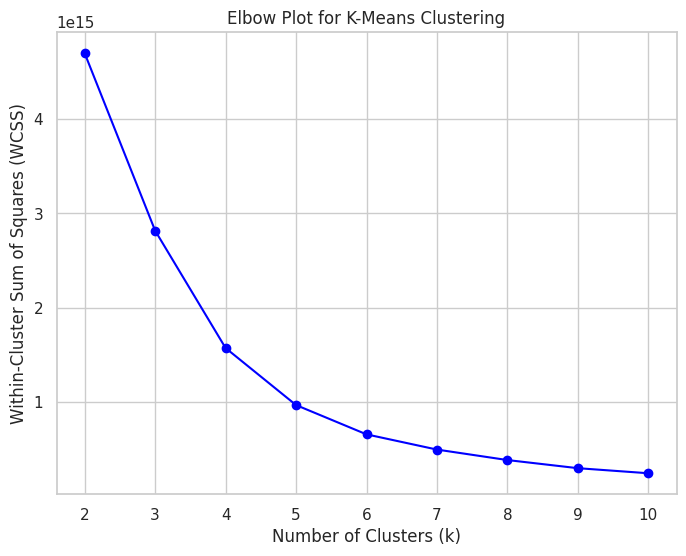

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = range(2, 11)
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [ ]:
# TODO: choose the best number of clusters (the elbow) and fill in
number_of_clusters = 5

In [ ]:
# Grader (2 points)
grader.grade(test_case_id = 'kmeans_elbow', answer = (number_of_clusters, wcss))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### (b) Re-fit with the best number of clusters

In [ ]:
# TODO: re-run the K-Means clustering with the best number of clusters
best_number_of_clusters = 5
kmeans = KMeans(n_clusters=best_number_of_clusters, n_init=5, random_state=0)
kmeans.fit(features)

KMeans(n_clusters=5, n_init=5, random_state=0)

In [ ]:
# Grader (3 points)
grader.grade(test_case_id = 'refit_kmeans', answer = (Counter(kmeans.labels_), kmeans.n_features_in_))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# **Part II:** Distributed Machine Learning with Spark (35  points)

Apache Spark ML is a machine learning library that consists of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

**Why Spark ML?**

Moving to the Big Data Era requires heavy iterative computations on very large datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. However, depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. _This **definitely speeds up** the learning phase and allows us to create better models._

**Read more about it with the Python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)**.

Run the code below to set up Spark.

**Note:** The cell below may take upto a 4-5 minutes to run.

In [ ]:
%%capture

!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

In [ ]:
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

spark = SparkSession.builder.appName('bigdata-hw4').getOrCreate()
sqlContext = SQLContext(spark)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
%load_ext sparkmagic.magics

In [ ]:
# Graph section
import networkx as nx

# SQLite RDBMS
import sqlite3

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

## **2.1** Initializing Spark Data [Subtotal 2 Points]

We have the spark setup ready, and we now need the data for our ML algorithms. We will use the data you processed in Part I, but in Spark.

### **2.1.0** Converting the Pandas Dataframe into a Spark Dataframe [0 Points]

Read the `encoded_df_properties` that you created in Part I into a Spark dataframe (`sdf`) and name the SDF as `properties_sdf`. \\
**Note:** Just like Part I, the target variable (label) for this section will be `"quality"`.

In [ ]:
#TODO: Read encoded_df_reservations into a Spark Dataframe called properties_sdf
properties_sdf = spark.createDataFrame(encoded_df_properties)

In [ ]:
# TODO: Verify that the schema of your Spark dataframe matches the above
#        Make sure to double-check that the target variable i.e. quality is of type "double"
from pyspark.sql.functions import col
properties_sdf = properties_sdf.withColumn("quality", col("quality").cast("double"))

Print out the Dataframe Schema and verify the datatypes. If you did everything correctly so far, the schema should be:
```
root
 |-- neighborhood: string (nullable = true)
 |-- price: long (nullable = true)
 |-- size_in_sqft: long (nullable = true)
 |-- price_per_sqft: double (nullable = true)
 |-- no_of_bedrooms: long (nullable = true)
 |-- no_of_bathrooms: long (nullable = true)
 |-- quality: double (nullable = true)
 |-- maid_room: long (nullable = true)
 |-- unfurnished: long (nullable = true)
 |-- balcony: long (nullable = true)
 |-- barbecue_area: long (nullable = true)
 |-- built_in_wardrobes: long (nullable = true)
 |-- central_ac: long (nullable = true)
 |-- childrens_play_area: long (nullable = true)
 |-- childrens_pool: long (nullable = true)
 |-- concierge: long (nullable = true)
 |-- covered_parking: long (nullable = true)
 |-- kitchen_appliances: long (nullable = true)
 |-- lobby_in_building: long (nullable = true)
 |-- maid_service: long (nullable = true)
 |-- networked: long (nullable = true)
 |-- pets_allowed: long (nullable = true)
 |-- private_garden: long (nullable = true)
 |-- private_gym: long (nullable = true)
 |-- private_jacuzzi: long (nullable = true)
 |-- private_pool: long (nullable = true)
 |-- security: long (nullable = true)
 |-- shared_gym: long (nullable = true)
 |-- shared_pool: long (nullable = true)
 |-- shared_spa: long (nullable = true)
 |-- study: long (nullable = true)
 |-- vastu_compliant: long (nullable = true)
 |-- view_of_landmark: long (nullable = true)
 |-- view_of_water: long (nullable = true)
 |-- walk_in_closet: long (nullable = true)
```

**Note:** Especially ensure that the target variable is of the datatype `double`. Cast it to the correct datatype, if needed.

### **2.1.1** Setting Up a VectorAssembler [2 Points]

Great! We have the processed data now. For Spark ML, we need to create a feature column which has all features concatenated as a list, and a single column for labels (which we already have!)
We will use `VectorAssembler()` to create a feature vector from all our features, and we will call this vectorized variable as “features”.

First, list all column names in `properties_sdf` and store them in a list variable called `all_columns`.

In [ ]:
# TODO: store all column names in the data_sdf in a list called "all_columns"
all_columns = properties_sdf.columns
print(all_columns)

['price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'quality', 'maid_room', 'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes', 'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked', 'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water', 'walk_in_closet']


Create a list of column(s) you don't want to include as your features (i.e., `'quality', 'neighborhood'`). Name this list `drop_columns`.

In [ ]:
# TODO: Create "drop_columns"
drop_columns = ['quality', 'neighborhood']

Now, using `drop_columns`, create a list called `feature_columns` that only contains the names of the columns that would be used as features for our ML models.

In [ ]:
# TODO: Create the "feature_columns" list
feature_columns =[col for col in all_columns if col not in drop_columns]
print(feature_columns)

['price', 'size_in_sqft', 'price_per_sqft', 'no_of_bedrooms', 'no_of_bathrooms', 'maid_room', 'unfurnished', 'balcony', 'barbecue_area', 'built_in_wardrobes', 'central_ac', 'childrens_play_area', 'childrens_pool', 'concierge', 'covered_parking', 'kitchen_appliances', 'lobby_in_building', 'maid_service', 'networked', 'pets_allowed', 'private_garden', 'private_gym', 'private_jacuzzi', 'private_pool', 'security', 'shared_gym', 'shared_pool', 'shared_spa', 'study', 'vastu_compliant', 'view_of_landmark', 'view_of_water', 'walk_in_closet']


In [ ]:
# 2 points
#Grader cell
grader.grade(test_case_id = 'check_feature_columns', answer = feature_columns)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Finally, create a [VectorAssembler](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.ml.feature.VectorAssembler.html) object with the columns that you want to use as features. Name your output column as `features` (i.e. they are the features that will be used for SparkML).

In [ ]:
# TODO: Import required library and create VectorAssembler object (to be used later)
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

## **2.2** Preprocessing: Pipeline and Train-Test Split [3 Points]

Now that we have a VectorAssembler object ready, let's use it on our Spark dataframe to get the concatenated features column. To do this, we implement a [Pipeline](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.Pipeline.html), which can be used to streamline multiple preprocessing stages at once. For this data, we just need a single stage with the assembler, but you could have other stages before that where you perform operations on the data like converting categorical strings in the features to numeric values, or do feature scaling operations.

We will create a pipeline with a single stage — the assembler. Fit the pipeline on `reservations_df` to create the transformed dataframe and name it `processed_reservations_sdf`.


In [ ]:
# TODO: Import required libraries

from pyspark.ml import Pipeline
# TODO: Define a pipeline object
pipeline = Pipeline(stages=[assembler])

# TODO: Fit and transform the pipeline on the data and store the transformed sdf as "processed_properties_sdf"
processed_properties_sdf=pipeline.fit(properties_sdf).transform(properties_sdf)

Now that we have the data in the format we need, we will create our train and test sets.

Conduct a train-test split where 80% of the data is assigned to the training set while the remaining 20% is assigned to the testing set.

- Name these sets as `train_sdf` and `test_sdf` respectively.
- Set the variable `random_seed` to 42 and then add the argument `seed = random_seed` in the function to fix the random state in order to ensure consistency with our results.

In [ ]:
# TODO: Assign appropriate value to the random_seed variable
random_seed = 42

# TODO: Do 80/20 train-test split with seed = random_seed and store them as "train_sdf" and "test_sdf"
train_sdf, test_sdf = processed_properties_sdf.randomSplit([0.8, 0.2], seed=random_seed)

In [ ]:
# Grader (3 points)
grader.grade(test_case_id = 'check_train_test_split_spark', answer = (train_sdf.count(), test_sdf.count(), random_seed))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **2.3** Modelling (SparkML) [Subtotal 30 Points]

Time to do the cool stuff! We will work on various types of models using SparkML to see the difference in implementation from sklearn.

### **2.3.1** Vanilla Logistic Regression [6 Points]

Let's train an **unregularized** Logistic Regression model to our data and try to predict whether the `booking_status` will be cancelled or not.

This time, we will use "Big" data tools to help us build a Logistic Regression model for binary classification. Look up the documentation online and try to understand how to implement this.

**Note**: Make sure to set the parameter `maxIter` to 5 for fast computation. For all logistic regression models, use `family='multinomial'`.

In [ ]:
# TODO: Import required library for Logistic Regression
from pyspark.ml.classification import LogisticRegression
# TO-DO: Instantiate and fit Logistic Regression model to training data
lr = LogisticRegression(maxIter=5, family='multinomial', labelCol="quality")
lr_model = lr.fit(train_sdf)

Calculate the training accuracy using the model's summary and store it in a variable called `train_accuracy`.

In [ ]:
# TODO: Get training accuracy and store it as `train_accuracy`
train_accuracy =  lr_model.summary.accuracy

In [ ]:
train_accuracy

0.9406130268199234

Now, let's find out how good the model actually is and see if it overfits to the training data.

Predict the labels `"quality"` for your test data and store them as `predictions` _(Hint: it is called 'transform' in SparkML)_

In [ ]:
# TODO: Make predictions on testing set and store it as "predictions"
predictions = lr_model.transform(test_sdf)

Given the confusion matrix, we can calculate various metrics such as accuracy, precision, recall, F1 score etc.

For our task, we will calculate the test accuracy. The formula for this is: \\

> Accuracy = $\frac{TP + TN}{TP + FP + TN + FN}$

Evaluate the performance using the Confusion Matrix using [MulticlassMetrics](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.mllib.evaluation.MulticlassMetrics.html) object in the SparkML Regression library. Store the Confusion Matrix as an numpy array named  `confusion_matrix`. \\

(*Ignore any warnings you may get*)

In [ ]:
# TODO: Import required libraries

from pyspark.mllib.evaluation import MulticlassMetrics
# TODO: Select appropriate columns to use MulticlassMetrics
# Hint: use the .rdd function when selecting the columns
# to create the input to MuliclassMetrics
true_labels = predictions.select("quality").rdd.map(lambda x: float(x[0]))
predicted_labels = predictions.select("prediction").rdd.map(lambda x: float(x[0]))
metrics = MulticlassMetrics(true_labels.zip(predicted_labels))
confusion_matrix = metrics.confusionMatrix().toArray()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Now, calculate the test accuracy using the Confusion Matrix obtained above and store it in a variable called `test_accuracy`.

In [ ]:
#TODO: Calculate test accuracy using the confusion matrix and store it as "test_accuracy"
true_positives = confusion_matrix[1, 1]
false_positives = confusion_matrix[0, 1]
true_negatives = confusion_matrix[0, 0]
false_negatives = confusion_matrix[1, 0]

test_accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)

test_accuracy

0.9491525423728814

In [ ]:
# 6 points
#Grader cell
grader.grade(test_case_id = 'check_unreg_logistic', answer = (train_accuracy, test_accuracy, confusion_matrix))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.3.2** Regularized Logistic Regression [8 Points]

Now, we will add regularization – LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2), to avoid overfitting. You can play around with different regularization (regParam and elasticNetParam) hyperparameters when initializing the 3 different regularized logistic regression models.

Compare these with each other and with the unregularized regression performed in 2.3.1.

Make sure to evaluate the performance on test data using the same methodology as above (using a confusion matrix to calculate the accuracy).

**Note**: Just like 2.3.1, set `maxIter` to 5.

#### (a) LASSO (L1)

First, implement a LASSO Logistic Regression model using SparkML and call it `l1_model`, fit it on `train_sdf` and get predictions using `test_sdf`. Get the training accuracy and store it as `l1_train_accuracy`.

In [ ]:
# TODO: Instantiate LASSO/L1 regularized model as "l1_model"
l1_model = LogisticRegression(featuresCol='features', labelCol='quality', maxIter=5, regParam=0.1, elasticNetParam=1.0)
# TODO: Fit and Transform using "l1_model"
l1_model = l1_model.fit(train_sdf)
l1_predictions = l1_model.transform(test_sdf)
# TODO: Store training accuracy as "l1_train_accuracy"
l1_train_accuracy =l1_model.summary.accuracy
l1_train_accuracy

0.8320561941251596

From the predictions, create a confusion matrix and use it to get the test accuracy. Store this accuracy value as `l1_test_accuracy`.

In [ ]:
# TODO: Create the Confusion matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="quality", predictionCol="prediction", metricName="accuracy")
l1_test_accuracy = evaluator.evaluate(l1_predictions)
true_labels = np.array(l1_predictions.select("quality").rdd.map(lambda x: x[0]).collect())
predicted_labels = np.array(l1_predictions.select("prediction").rdd.map(lambda x: x[0]).collect())
confusion_matrix_l1 = np.zeros((4, 4), dtype=int)
for i in range(len(true_labels)):
    confusion_matrix_l1[int(true_labels[i])][int(predicted_labels[i])] += 1

l1_test_accuracy, confusion_matrix_l1

(0.8525073746312685,
 array([[ 59,  25,   0,   0],
        [  1, 222,   0,   0],
        [  0,  23,   0,   0],
        [  0,   1,   0,   8]]))

#### (b) Ridge (L2)

Next, implement a Ridge Logistic Regression model using SparkML and call it `l2_model`, fit it on `train_sdf` and get predictions using `test_sdf`. Get the training accuracy and store it as `l2_train_accuracy`.

In [ ]:
# TODO: Instantiate Ridge/L2 regularized model as "l2_model"
l2_model = LogisticRegression(featuresCol="features", labelCol="quality", maxIter=5, regParam=0.1, family="multinomial")

# TODO: Fit and Transform using "l2_model"

l2_model = l2_model.fit(train_sdf)
l2_train_predictions = l2_model.transform(train_sdf)
evaluator = MulticlassClassificationEvaluator(labelCol="quality", predictionCol="prediction", metricName="accuracy")
# TODO: Store training accuracy as "l2_train_accuracy"
l2_train_accuracy = evaluator.evaluate(l2_train_predictions)
l2_train_accuracy

0.9157088122605364

From the predictions, create a confusion matrix and use it to get the test accuracy. Store this accuracy value as `l2_test_accuracy`.

In [ ]:
# TODO: Create the Confusion matrix
# TODO: Create the Confusion matrix
l2_train_predictions = l2_train_predictions.withColumn("prediction", col("prediction").cast(DoubleType()))
l2_train_predictions = l2_train_predictions.withColumn("quality", col("quality").cast(DoubleType()))
predictions_and_labels = l2_train_predictions.select("prediction", "quality").rdd
metrics = MulticlassMetrics(predictions_and_labels)
confusion_matrix_l2 = metrics.confusionMatrix().toArray()

TP = confusion_matrix_l2[1, 1]
TN = confusion_matrix_l2[0, 0]
FP = confusion_matrix_l2[0, 1]
FN = confusion_matrix_l2[1, 0]

# TODO: Calculate the test accuracy as done in the previous section. Store test accuracy as "l1_test_accuracy"
l2_test_accuracy = (TP + TN) / (TP + FP + TN + FN)
l2_test_accuracy, confusion_matrix_l2

(0.9462989840348331,
 array([[391.,  69.,   0.,   0.],
        [  5., 913.,   5.,   0.],
        [  0.,  49.,  59.,   3.],
        [  0.,   0.,   1.,  71.]]))

#### (c) Elastic Net

Finally, implement an Elastic Net Logistic Regression model using SparkML and call it `en_model`, fit it on `train_sdf` and get predictions using `test_sdf`. Get the training accuracy and store it as `en_train_accuracy`.

In [ ]:
# TODO: Instantiate Elastic Net regularized model as "en_model"
# Importing the necessary libraries
from pyspark.ml.classification import LogisticRegression
en_model = LogisticRegression(maxIter=5, regParam=0.1, elasticNetParam=0.5, labelCol='quality', family='multinomial')
en_model = en_model.fit(train_sdf)
en_predictions = en_model.transform(test_sdf)
en_train_accuracy = en_model.summary.accuracy

en_train_accuracy

0.8607918263090677

From the predictions, create a confusion matrix and use it to get the test accuracy. Store this accuracy value as `en_test_accuracy`.

In [ ]:
# TO-DO: Create the Confusion matrix

en_predictions = en_predictions.withColumn("prediction", col("prediction").cast(DoubleType()))
en_predictions = en_predictions.withColumn("quality", col("quality").cast(DoubleType()))
predictions_and_labels = en_predictions.select("prediction", "quality").rdd
metrics = MulticlassMetrics(predictions_and_labels)
confusion_matrix_en = metrics.confusionMatrix().toArray()

TP = confusion_matrix_en[1, 1]
TN = confusion_matrix_en[0, 0]
FP = confusion_matrix_en[0, 1]
FN = confusion_matrix_en[1, 0]

en_test_accuracy = (TP + TN) / (TP + FP + TN + FN)
en_test_accuracy, confusion_matrix_en

# TODO: Calculate the test accuracy as done in the p


(0.9381107491856677,
 array([[ 68.,  16.,   0.,   0.],
        [  3., 220.,   0.,   0.],
        [  0.,  23.,   0.,   0.],
        [  0.,   1.,   0.,   8.]]))

In [ ]:
#8 points
#Grader cell
grader.grade(test_case_id = 'check_reg_logistic', answer = (l1_model.getElasticNetParam(), l1_model.getRegParam(), l1_train_accuracy, l1_test_accuracy, l2_model.getElasticNetParam(), l2_model.getRegParam(), l2_train_accuracy, l2_test_accuracy, en_model.getElasticNetParam(), en_model.getRegParam(), en_train_accuracy, en_test_accuracy))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.3.3** Random Forest Classification [8 Points]

If you are looking to win Kaggle competitions, you definitely must know about Random Forests, Boosted Trees, etc. These ensemble methods generalize and work surprisingly well for a lot of classification problems and sometimes for regression problems (though regression trees are not the focus of this course).

Let's give it a go. Similar to what you did for the Logistic Regression model, create a Random Forest classifier model and name it `rf` and fit it to the training data. Call the fitted model `rf_model`.

**Note1:** Set the `random_seed` to 42 and set the argument `seed = random_seed` while creating `rf` as a RandomForest object. \\
**Note2:** Set `maxDepth` to 10 to find a good balance between performance and computation time.

In [ ]:
# TODO: Import required libraries

from pyspark.ml.classification import RandomForestClassifier

# TODO: Set random_seed to 42
random_seed = 42

# TODO: Instantiate the RF Model and call it "rf", then fit it on the training data
rf =RandomForestClassifier(seed=random_seed, maxDepth=10,labelCol="quality")
rf_model = rf.fit(train_sdf)

This time, get predictions on both the training and testing sets, and store them as `train_pred` and `test_pred` respectively.

In [ ]:
# TODO: Get predictions and save to "train_pred" and "test_pred" respectively
train_pred =rf_model.transform(train_sdf)
test_pred = rf_model.transform(test_sdf)

Evaluate using the accuracy metric again, similar to the previous sections.
- Store the confusion matrices as `rf_train_cm` and `rf_test_cm` respectively.
- Store the training and test accuracy as `rf_train_accuracy` and  `rf_test_accuracy` respectively.

In [ ]:
# TODO: Evaluate the prediction accuracy for train set and call it "rf_train_accuracy"
train_pred_rdd = train_pred.select("prediction", "quality").rdd
test_pred_rdd = test_pred.select("prediction", "quality").rdd
rf_train_metrics = MulticlassMetrics(train_pred_rdd)
rf_test_metrics = MulticlassMetrics(test_pred_rdd)

rf_train_cm = rf_train_metrics.confusionMatrix().toArray()

rf_train_accuracy = rf_train_metrics.accuracy

# TODO: Evaluate the prediction accuracy for test set and call it "rf_test_accuracy"

rf_test_cm =rf_test_metrics.confusionMatrix().toArray()
rf_test_accuracy =rf_test_metrics.accuracy

In [ ]:
# 8 points
#Grader
grader.grade(test_case_id = 'check_random_forest', answer = (rf_train_accuracy, train_pred.count(), rf_test_accuracy, test_pred.count(), rf_train_cm, rf_test_cm))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### **2.3.4** Dimensionality Reduction Using PCA [8 Points]

We will again use the powerful PCA to reduce the dimensions and project the data onto a lower dimensional space and fit a logistic regression on the new projected data.

Initialize a PCA model on SparkML, where you select an appropriate number of dimensions, and call it `pca`. Then, fit the model on the training data and get the PCA features from the trained model.

**Hint**: Choose `k` for the PCA model using the explained variance plot you made earlier in 1.4.2

In [ ]:
# Import required libraries
from pyspark.ml.feature import PCA
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=True)
scaler_model = scaler.fit(train_sdf)
scaled_train_data = scaler_model.transform(train_sdf)
test_sdf_scaled = scaler_model.transform(test_sdf)
k = 1
pca = PCA(k=k, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_train_data)
train_sdf_pca = pca_model.transform(scaled_train_data)
test_sdf_pca = pca_model.transform(test_sdf_scaled)

Now, create a Logistic Regression model and train it using the PCA features.

In [ ]:
# TODO: Instantiate Logistic Regression model and call the model object "lr_model"
lr_model = LogisticRegression(featuresCol="pca_features", labelCol="quality")
lr_model = lr_model.fit(train_sdf_pca)
# TODO: Fit Logistic Regression Model and get predictions
test_pred = lr_model.transform(test_sdf_pca)

Calculate the training accuracy using the model's summary and store it in a variable called `train_accuracy_pca`.

In [ ]:
# TODO: Get training accuracy and store it as `train_accuracy_pca`
evaluator = MulticlassClassificationEvaluator(labelCol="quality", predictionCol="prediction", metricName="accuracy")
train_accuracy_pca = evaluator.evaluate(test_pred)


Evaulate the test performance by creating a confusion matrix and call it `confusion_matrix_pca`. Then, calculate the test accuracy using the confusion matrix  and store it as `test_accuracy_pca`.

In [ ]:
# TODO: Create confusion matrix and store it as "confusion_matrix_pca"
test_pred = test_pred.withColumn("prediction", col("prediction").cast(DoubleType()))
test_pred  = test_pred.withColumn("quality", col("quality").cast(DoubleType()))

predictions_and_labels = test_pred.select("prediction", "quality").rdd
metrics = MulticlassMetrics(predictions_and_labels)

confusion_matrix_pca = metrics.confusionMatrix().toArray()
TP = confusion_matrix_pca[1, 1]
TN = confusion_matrix_pca[0, 0]
FP = confusion_matrix_pca[0, 1]
FN = confusion_matrix_pca[1, 0]
test_accuracy_pca = (TP + TN) / (TP + FN + TN + FP)


In [ ]:
# 8 points
#Grader cell
grader.grade(test_case_id = 'check_pca', answer = (pca.getK(), len(lr_model.coefficientMatrix.toArray()), train_accuracy_pca, test_accuracy_pca, confusion_matrix_pca))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Homework Submission

Good job! You have finished the homework :) The submission instructions are as follows:

* **Double check** that you have the correct PennID (all numbers) in the autograder.

* **Triple check** that you fulfilled all the requirements mentioned in the beginning of the notebook.

*  Go to the "File" tab at the top left of the Colab UI, click "Download .ipynb" and then "Download .py".  **Rename** these two files to `homework4.ipynb` and `homework4.py` respectively and upload them to Gradescope.

* You must submit your notebook to receive credit. Post any issues with submission on Ed and make sure to keep in mind the late day policy.

* After you submit your code, the teaching staff will manually grade your Colab notebook in order to validate the correctness of your code.